In [ ]:
#Import libraries
import cv2
import os
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tabulate import tabulate

In [ ]:
def calculate_scene_complexity(image_path):
    """Compute scene complexity score using edge density and color variation."""
    image = cv2.imread(image_path)
    if image is None:
        return None, None

    # Convert to grayscale for edge detection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray, threshold1=100, threshold2=200)

    # Edge Density: ratio of edge pixels to total pixels
    num_edge_pixels = np.sum(edges > 0)
    total_pixels = edges.size
    edge_density = num_edge_pixels / total_pixels

    # Normalize color values to [0, 1] before calculating standard deviation
    image_normalized = image.astype(np.float32) / 255.0
    color_std = np.std(image_normalized)

    # Final Scene Complexity Score: average of edge density and color variation
    complexity_score = (edge_density + color_std) / 2

    return round(complexity_score, 4), image

In [ ]:
def compute_and_visualize_scores(folder_path, max_images=20):
    """Compute scene complexity scores and visualize images with scores."""
    image_extensions = ['*.jpg', '*.jpeg', '*.png']
    image_paths = []

    # Collect all image paths
    for ext in image_extensions:
        image_paths.extend(glob(os.path.join(folder_path, ext)))

    results = []

    for path in image_paths:
        score, image = calculate_scene_complexity(path)
        if score is not None:
            results.append((os.path.basename(path), score, image))

    # Sort results by scene complexity score (descending)
    results.sort(key=lambda x: x[1], reverse=True)

    # Select top images for visualization
    results = results[:max_images]

    # Print scores as a formatted table
    score_table = [[name, score] for name, score, _ in results]
    print(tabulate(score_table, headers=["Image", "Scene Complexity Score"], tablefmt="grid"))

+-----------------+--------------------------+
| Image           |   Scene Complexity Score |
+=================+==========================+
| High(i).png     |                   0.2096 |
+-----------------+--------------------------+
| High(ii).png    |                   0.2082 |
+-----------------+--------------------------+
| High(iii).png   |                   0.1963 |
+-----------------+--------------------------+
| Medium(i).png   |                   0.1492 |
+-----------------+--------------------------+
| Medium(ii).png  |                   0.1476 |
+-----------------+--------------------------+
| Medium(iii).png |                   0.1345 |
+-----------------+--------------------------+
| Low(i).png      |                   0.1005 |
+-----------------+--------------------------+
| Low(ii).png     |                   0.0997 |
+-----------------+--------------------------+
| Low(iii).png    |                   0.089  |
+-----------------+--------------------------+


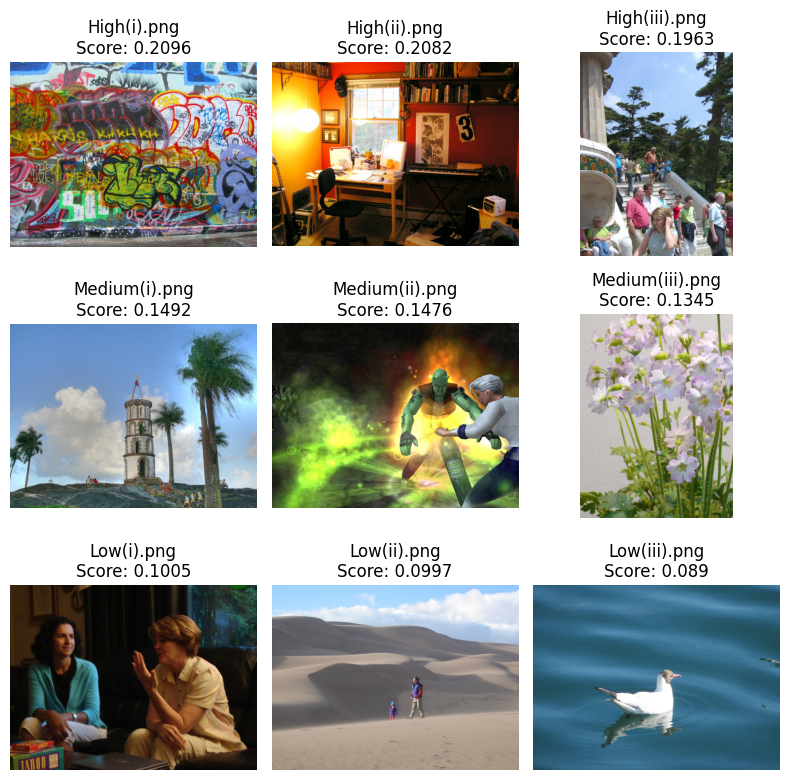

In [ ]:
# Plotting
n_cols = 4
n_rows = int(np.ceil(len(results) / n_cols))

plt.figure(figsize=(8, 8))
for idx, (name, score, img) in enumerate(results):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3, 3, idx + 1)
    plt.imshow(img_rgb)
    plt.title(f"{name}\nScore: {score}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
folder_path = "stimuli/"  # Update to your image folder path
compute_and_visualize_scores(folder_path)
